## Pacmann - Intro to ML Individual Project

#### By: Septia Wulandari Suarka

### Data Description:

Dataset Source: https://www.kaggle.com/code/ajaymanwani/loan-approval-prediction

Dataset berisikan tentang data perusahaan Dream Housing Finance mengenai pengajuan kredit rumah.

Dataset Description:

Number of columns: 13
Number of rows: 614
Number of Independent Columns: 12
Number of Dependent Column: 1

## Import Libraries

In [1]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Importing sklearn module for data processing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Importing ML Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, AdaBoostClassifier,
    GradientBoostingClassifier
)

# Importing Classfication Metrics
from sklearn.metrics import (
    confusion_matrix,  classification_report, f1_score,
    precision_score, recall_score, accuracy_score, roc_curve, auc
)
    
# Importing SMOTE to balance the data
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (C:\Users\pradi\anaconda3\lib\site-packages\sklearn\utils\metaestimators.py)

In [2]:
def importData(filename):
    # Read Data
    df = pd.read_csv(filename)
    print(f"shape awal                    : {df.shape}, (#observasi, #fitur)")

    # Drop duplicate
    df = df.drop_duplicates()
    print(f"shape setelah drop duplikat   : {df.shape}, (#observasi, #fitur)")

    return df

In [79]:
def modelPredictionResult(classifier,
                         input_data: pd.DataFrame,
                         output_data: pd.DataFrame):
    """This function is used to predict models in binary mode

    The classifier don't have annotation because it will handle
    any sklearn classifier that is needed for prediction.

    The input_data can be X_train or X_test data.
    The output_data can be y_train or y_test data.

    The function will print the confusion matrix and the classifcation report.

    The function will return the prediction results to be used later for
    determining classification score and aucroc curve.
    """
    
    # 1. Get Prediction Result
    model_prediction = classifier.predict(input_data)
    
    # 2. Get Confusion Matrix
    cm = confusion_matrix(y_true=output_data,
                         y_pred=model_prediction)
    
    print("Confusion Matrix")
    print(f"[True Negative: {cm[0, 0]}    False Negative: {cm[0,1]}]\n"
          f"[False Positive: {cm[1, 0]}   True Positive: {cm[1,1]}]\n")
    
    # 3. Get CLassification Report
    print("\nClassification Report")
    print(classification_report(y_true=output_data,
                               y_pred=model_prediction,
                               target_names=["no","yes"]))
          
    return model_prediction

In [224]:
def classScore(model_prediction,
               output_data: pd.DataFrame)-> dict:
    """The Function is used to get the classification score

    The model prediction can be from any model prediction result
    that is generated by the classifier.
    
    The model prediction is used to generate classification scores: 
        - Accuracy
        - Recall
        - F1-Score
        - Precision

    Then those score will be printed and then stored in dictionary
    for the future use.

    The output data can be y_train or y_test data
    """
     # 2. Classification Score Summary
    score_summary = {}
    score_summary["accuracy"] = accuracy_score(y_true=output_data,
                                               y_pred=model_prediction)
    score_summary["recall"] = recall_score(y_true=output_data,
                                           y_pred=model_prediction)
    score_summary["f1_score"] = f1_score(y_true=output_data,
                                         y_pred=model_prediction)
    score_summary["precision"] = precision_score(y_true=output_data,
                                                 y_pred=model_prediction)
    # Printing score results
    print("Classification Score Summary")
    print("Classifier Accuracy score: ", score_summary["accuracy"])
    print("Classifier Recall score: ", score_summary["recall"])
    print("Classifier f1-score: ", score_summary["f1_score"])
    print("Classifier precision: ", score_summary["precision"])

    return score_summary

In [81]:
def rocAucResult(model_prediction,
                output_data: pd.DataFrame)-> dict:
    """This function is used to display the roc curve

    The model prediction can be any prediction from any classifier
    that has been created for the purpose of generating fpr, tpr and threshold
    These information are used to display the ROC Curve.

    The FPR, TPR and ROC_AUC values are stored in dictionary for future used.

    The output data can be y_train or y_test data.
    """
    
    results = {}
    
    fpr, tpr, threshold = roc_curve(output_data,
                                   model_prediction)
    roc_auc = auc(fpr, tpr)
    
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0,1])
    plt.ylim([0,1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
    results["fpr"] = fpr
    results["tpr"] = tpr
    results["roc_auc"] = roc_auc
    
    return results

# Import Dataset

In [3]:
filename = 'train.csv'

df = importData(filename = filename)

df.head()

shape awal                    : (614, 13), (#observasi, #fitur)
shape setelah drop duplikat   : (614, 13), (#observasi, #fitur)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Menghapus kolom yang tidak digunakan

In [4]:
df.drop(columns = 'Loan_ID', inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Exploratory Data Analysis

Cek Distribusi Data

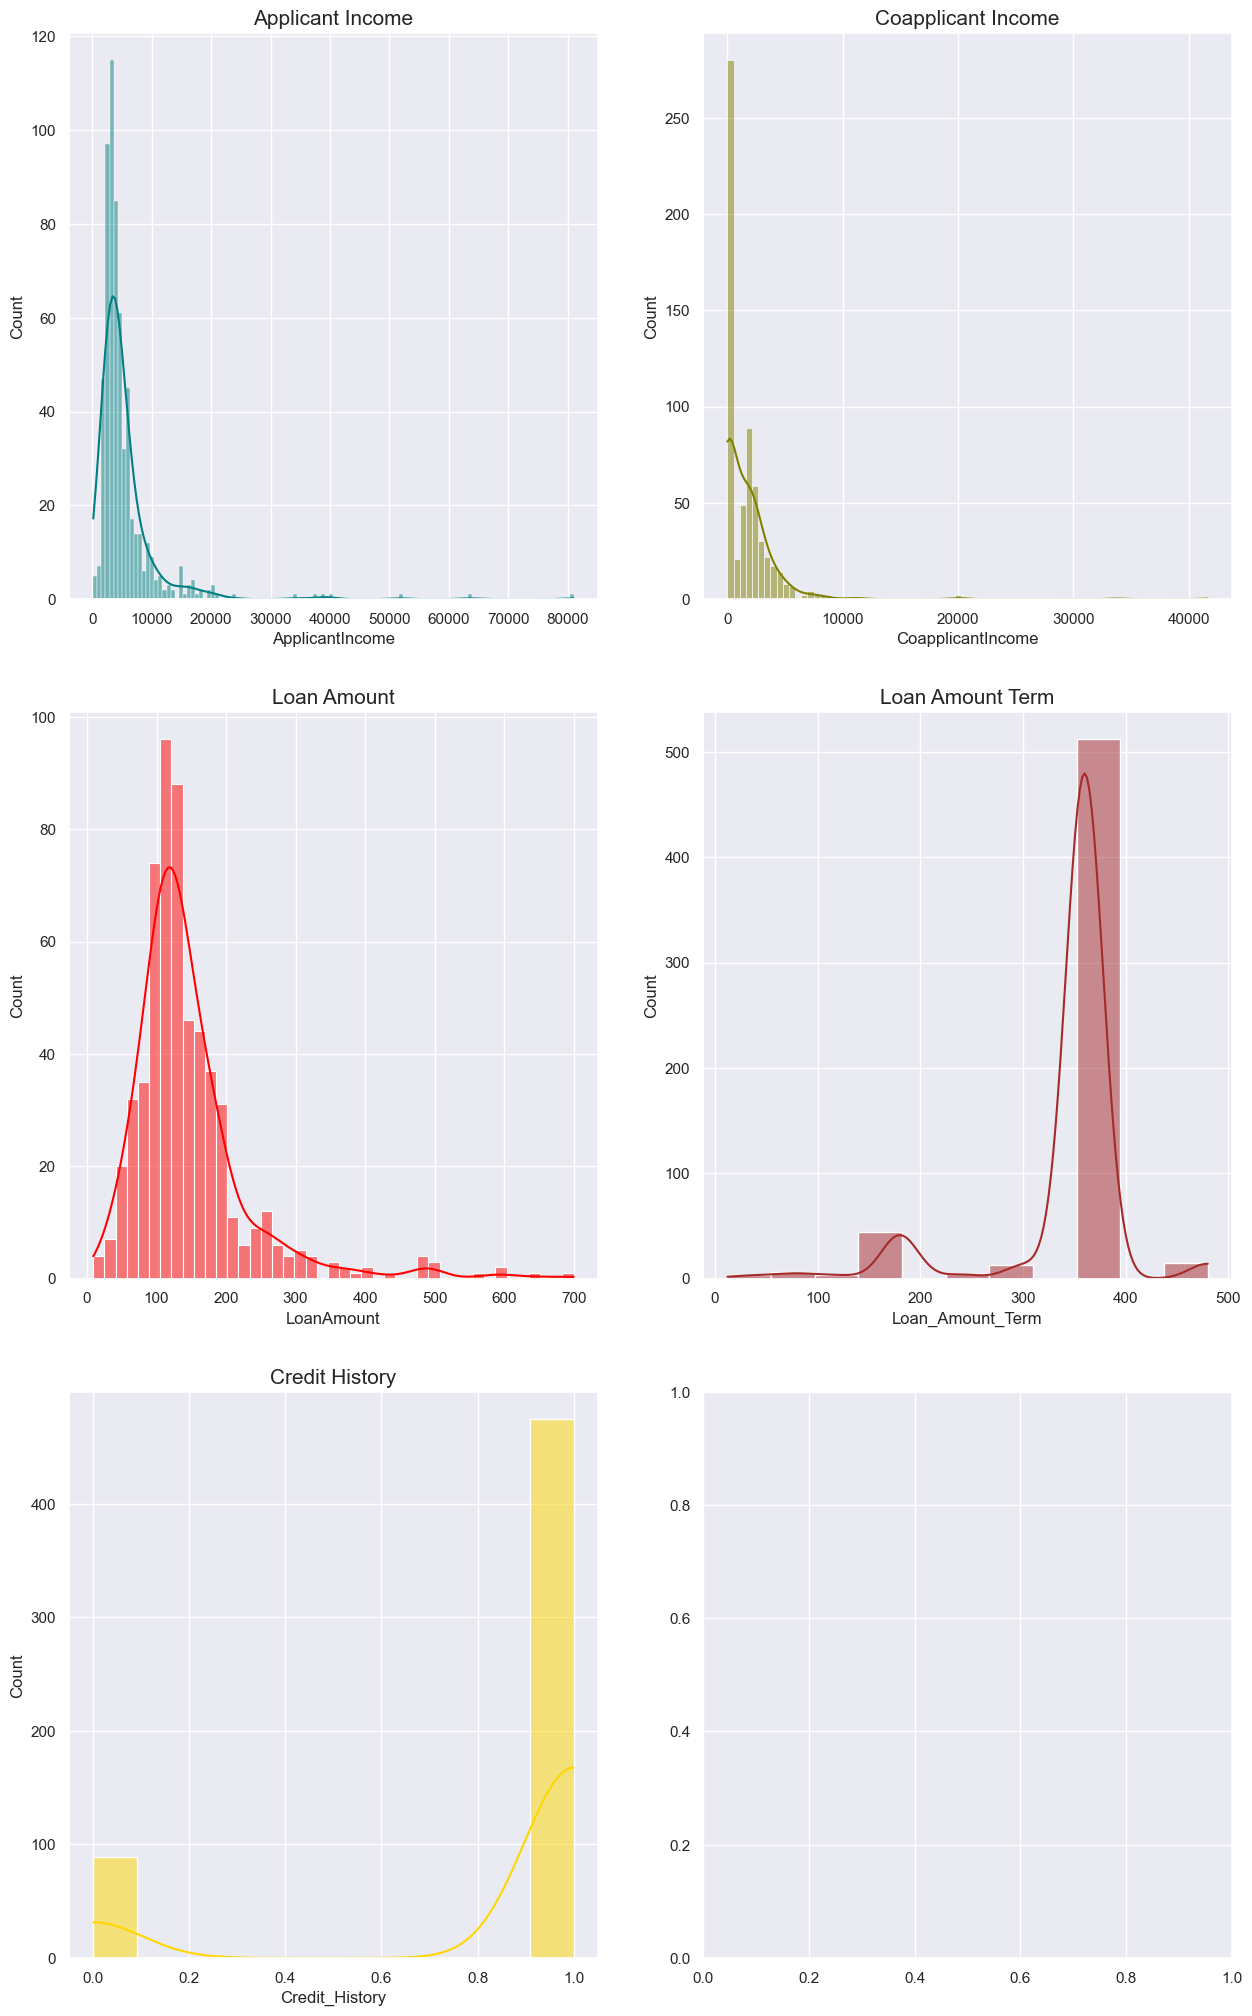

In [7]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15,25))

sns.histplot(data=df, x="ApplicantIncome", kde=True, color="teal", ax=axs[0,0])
axs[0,0].set_title("Applicant Income", fontsize=15)

sns.histplot(data=df, x="CoapplicantIncome", kde=True, color="olive", ax=axs[0,1])
axs[0,1].set_title("Coapplicant Income", fontsize=15)

sns.histplot(data=df, x="LoanAmount", kde=True, color="red", ax=axs[1,0])
axs[1,0].set_title("Loan Amount", fontsize=15)

sns.histplot(data=df, x="Loan_Amount_Term", kde=True, color="brown", ax=axs[1,1])
axs[1,1].set_title("Loan Amount Term", fontsize=15)

sns.histplot(data=df, x="Credit_History", kde=True, color="gold", ax=axs[2,0])
axs[2,0].set_title("Credit History", fontsize=15)

plt.show()

Cek Outliers

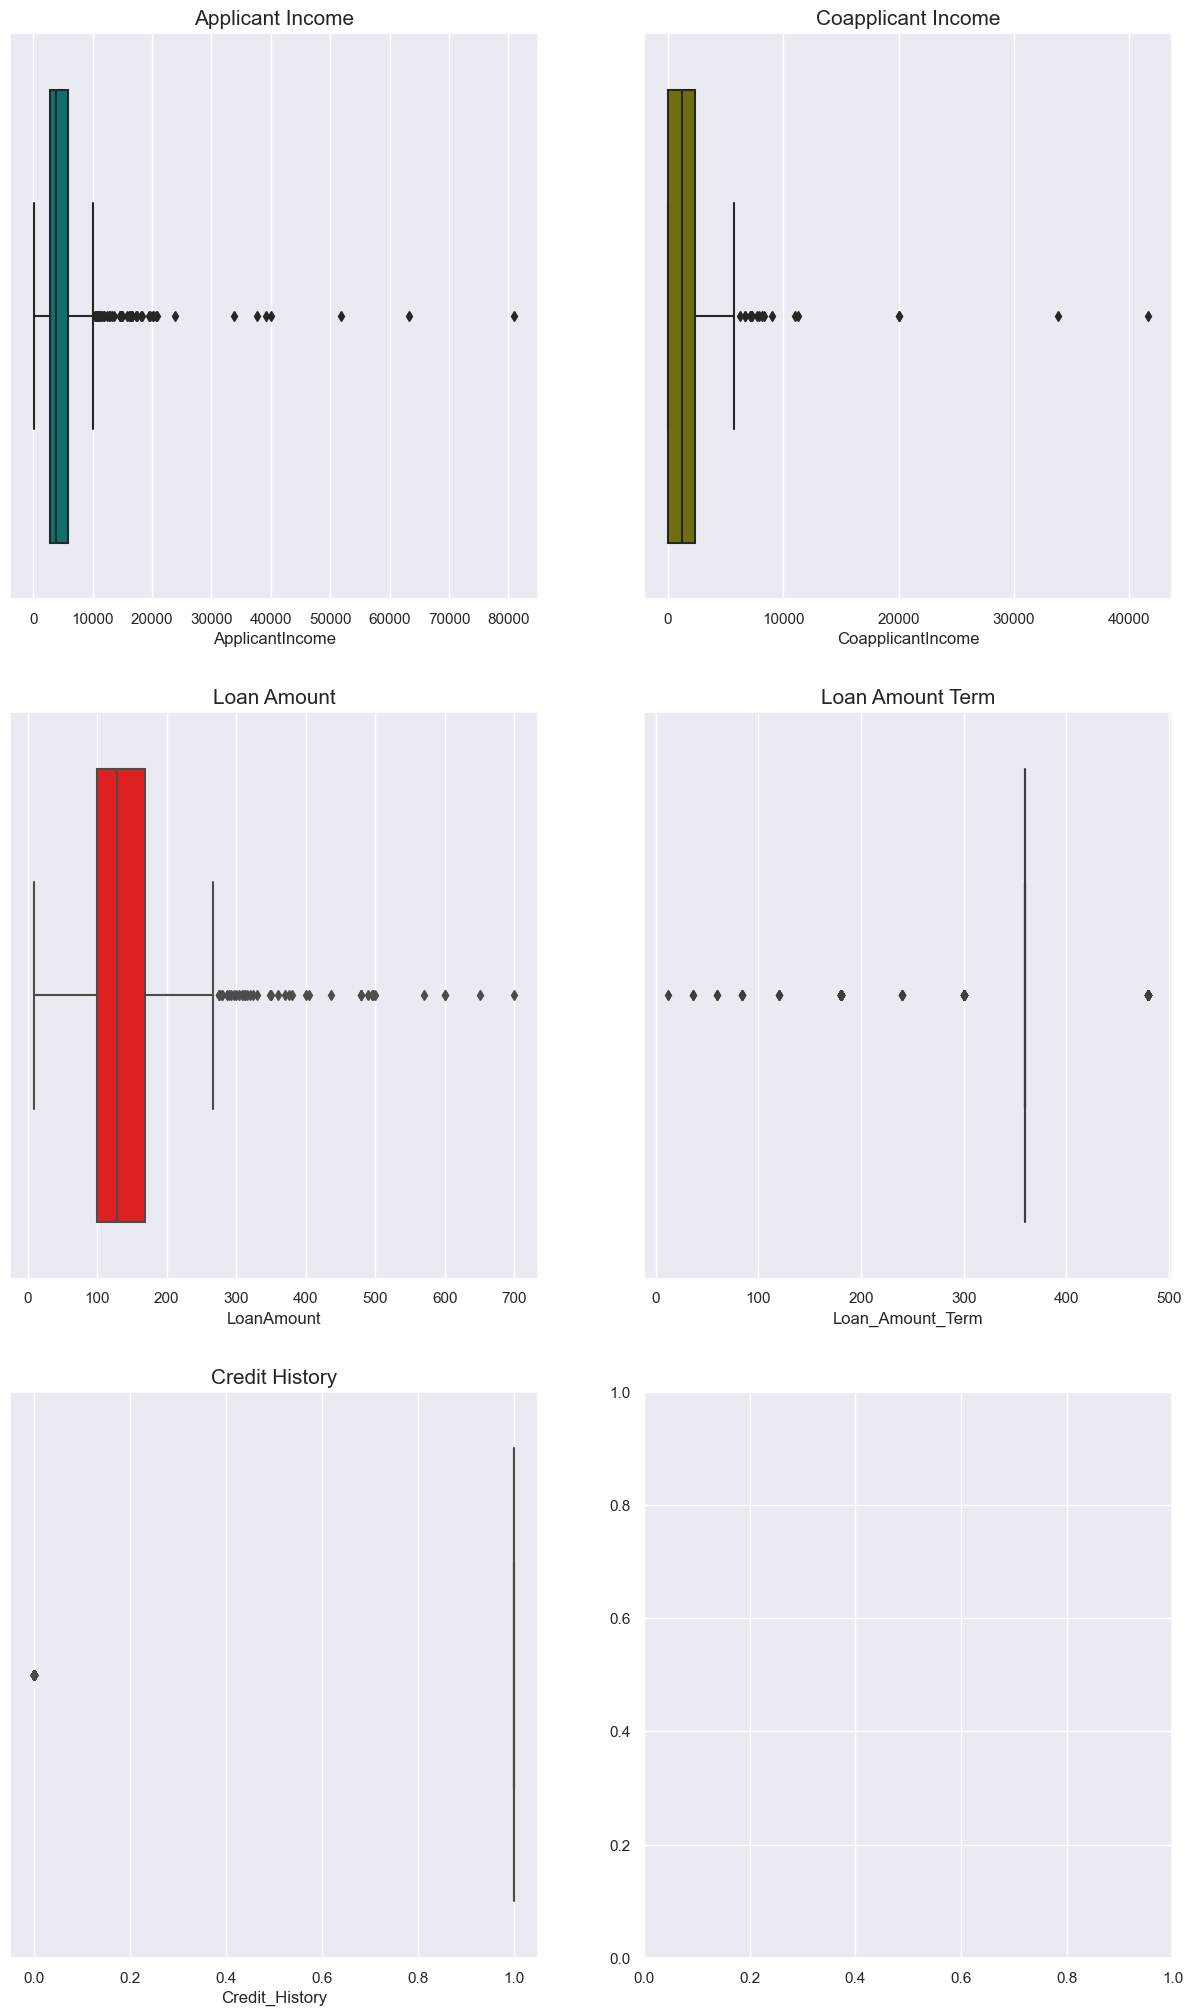

In [8]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15,25))

sns.boxplot(data=df, x="ApplicantIncome", color="teal", ax=axs[0,0])
axs[0,0].set_title("Applicant Income", fontsize=15)

sns.boxplot(data=df, x="CoapplicantIncome", color="olive", ax=axs[0,1])
axs[0,1].set_title("Coapplicant Income", fontsize=15)

sns.boxplot(data=df, x="LoanAmount", color="red", ax=axs[1,0])
axs[1,0].set_title("Loan Amount", fontsize=15)

sns.boxplot(data=df, x="Loan_Amount_Term", color="brown", ax=axs[1,1])
axs[1,1].set_title("Loan Amount Term", fontsize=15)

sns.boxplot(data=df, x="Credit_History", color="gold", ax=axs[2,0])
axs[2,0].set_title("Credit History", fontsize=15)

plt.show()

Menghapus Outliers

In [9]:
for col_name in ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']:
    #quartile1
    val_Q1 = np.percentile(df[col_name], 25, interpolation = 'midpoint')
    
    #quartile3
    val_Q3 = np.percentile(df[col_name], 75, interpolation= 'midpoint')
    
    #IQR
    val_IQR = val_Q3 - val_Q1
    print("Removing outliers from ", col_name)
    print("Old Data Shape: ", df.shape)
    
    # Upper bound
    upper = np.where(df[col_name] >= (val_Q3+1.5*val_IQR))
    # Lower bound
    lower = np.where(df[col_name] <= (val_Q1-1.5*val_IQR))
    
    # Removing the Outliers
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
    
    print("New Data Shape: ", df.shape)
    
    df.reset_index(inplace=True, drop=True)

Removing outliers from  ApplicantIncome
Old Data Shape:  (614, 12)
New Data Shape:  (564, 12)
Removing outliers from  CoapplicantIncome
Old Data Shape:  (564, 12)
New Data Shape:  (548, 12)
Removing outliers from  LoanAmount
Old Data Shape:  (548, 12)
New Data Shape:  (548, 12)
Removing outliers from  Loan_Amount_Term
Old Data Shape:  (548, 12)
New Data Shape:  (548, 12)


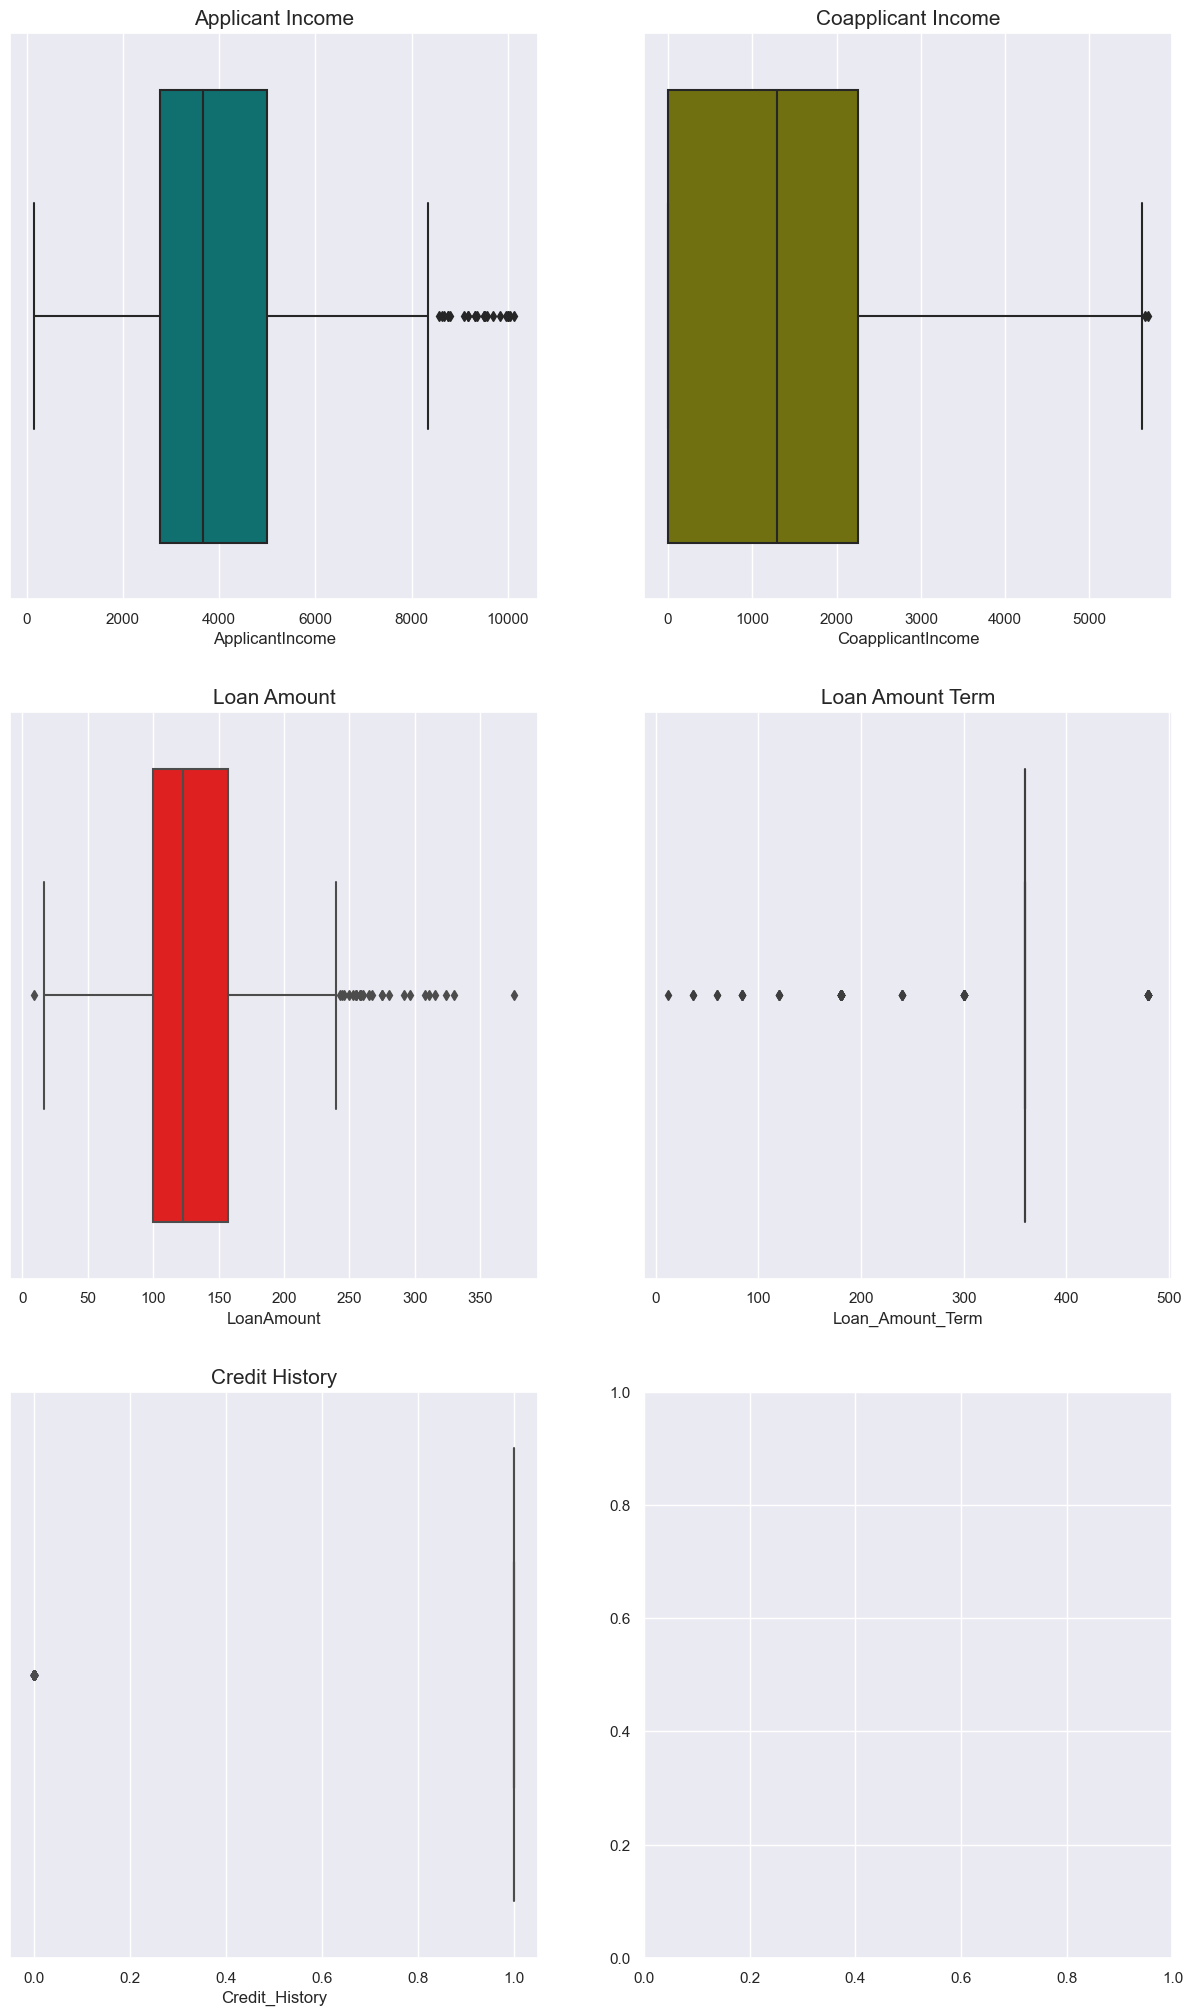

In [10]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15,25))

sns.boxplot(data=df, x="ApplicantIncome", color="teal", ax=axs[0,0])
axs[0,0].set_title("Applicant Income", fontsize=15)

sns.boxplot(data=df, x="CoapplicantIncome", color="olive", ax=axs[0,1])
axs[0,1].set_title("Coapplicant Income", fontsize=15)

sns.boxplot(data=df, x="LoanAmount", color="red", ax=axs[1,0])
axs[1,0].set_title("Loan Amount", fontsize=15)

sns.boxplot(data=df, x="Loan_Amount_Term", color="brown", ax=axs[1,1])
axs[1,1].set_title("Loan Amount Term", fontsize=15)

sns.boxplot(data=df, x="Credit_History", color="gold", ax=axs[2,0])
axs[2,0].set_title("Credit History", fontsize=15)

plt.show()

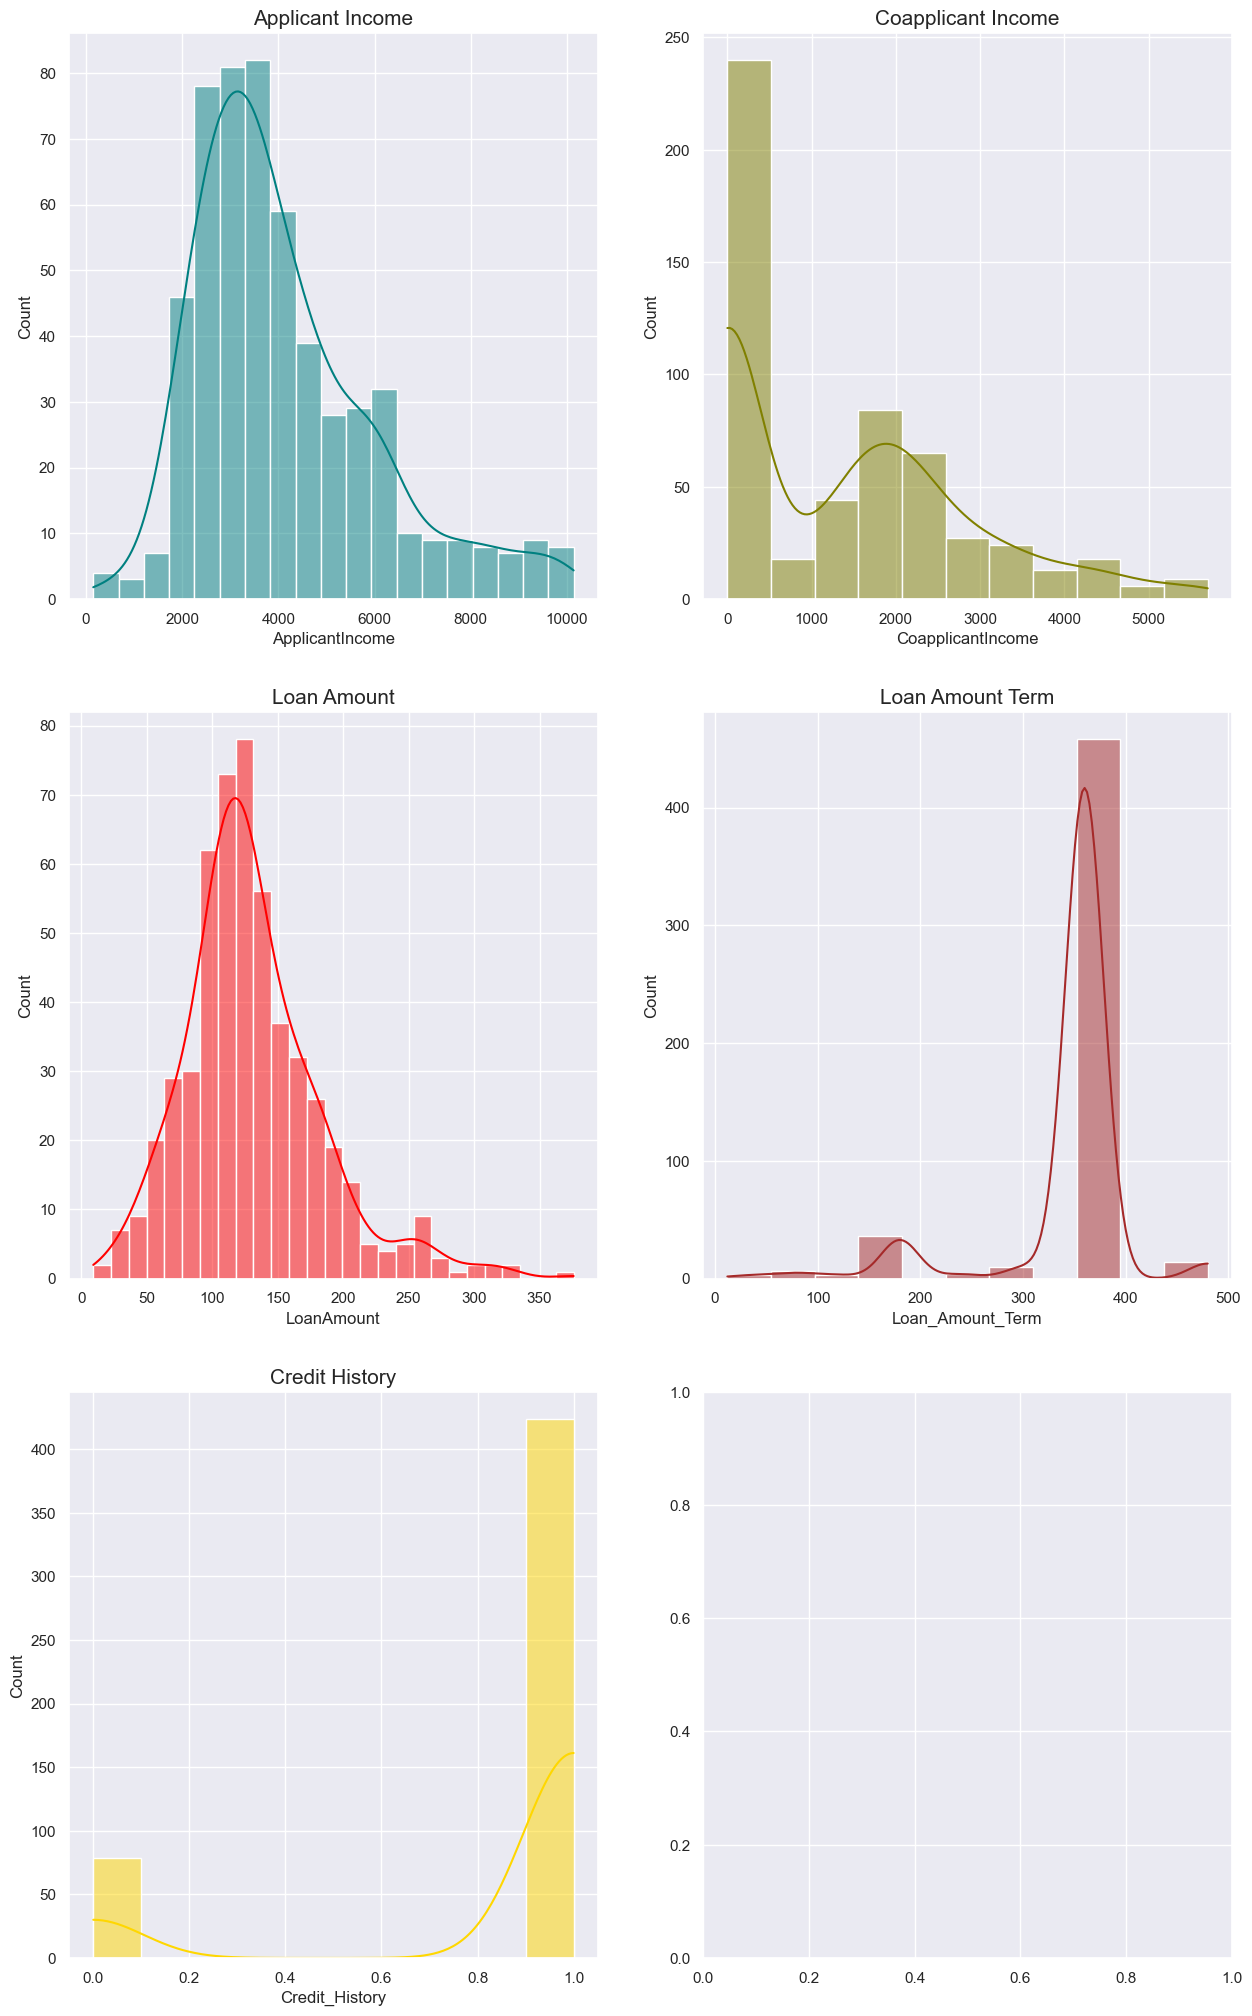

In [11]:
# set a grey background (use sns.set_theme() if seaborn version 0.11.0 or above)
sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 2, figsize=(15,25))

sns.histplot(data=df, x="ApplicantIncome", kde=True, color="teal", ax=axs[0,0])
axs[0,0].set_title("Applicant Income", fontsize=15)

sns.histplot(data=df, x="CoapplicantIncome", kde=True, color="olive", ax=axs[0,1])
axs[0,1].set_title("Coapplicant Income", fontsize=15)

sns.histplot(data=df, x="LoanAmount", kde=True, color="red", ax=axs[1,0])
axs[1,0].set_title("Loan Amount", fontsize=15)

sns.histplot(data=df, x="Loan_Amount_Term", kde=True, color="brown", ax=axs[1,1])
axs[1,1].set_title("Loan Amount Term", fontsize=15)

sns.histplot(data=df, x="Credit_History", kde=True, color="gold", ax=axs[2,0])
axs[2,0].set_title("Credit History", fontsize=15)

plt.show()

Cek Null Values

In [12]:
df.isnull().sum()

Gender               10
Married               3
Dependents           14
Education             0
Self_Employed        29
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           20
Loan_Amount_Term     14
Credit_History       45
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
numerical_column = list(df.select_dtypes(include = np.number).columns)
categorical_column = list(df.select_dtypes(include='object').columns)

categorical_column, numerical_column

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

In [14]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(df[numerical_column])

df[numerical_column] = imputer.transform(df[numerical_column])

In [15]:
df[numerical_column].isna().sum()

ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
dtype: int64

In [16]:
df[categorical_column] = df[categorical_column].fillna('Unknown')

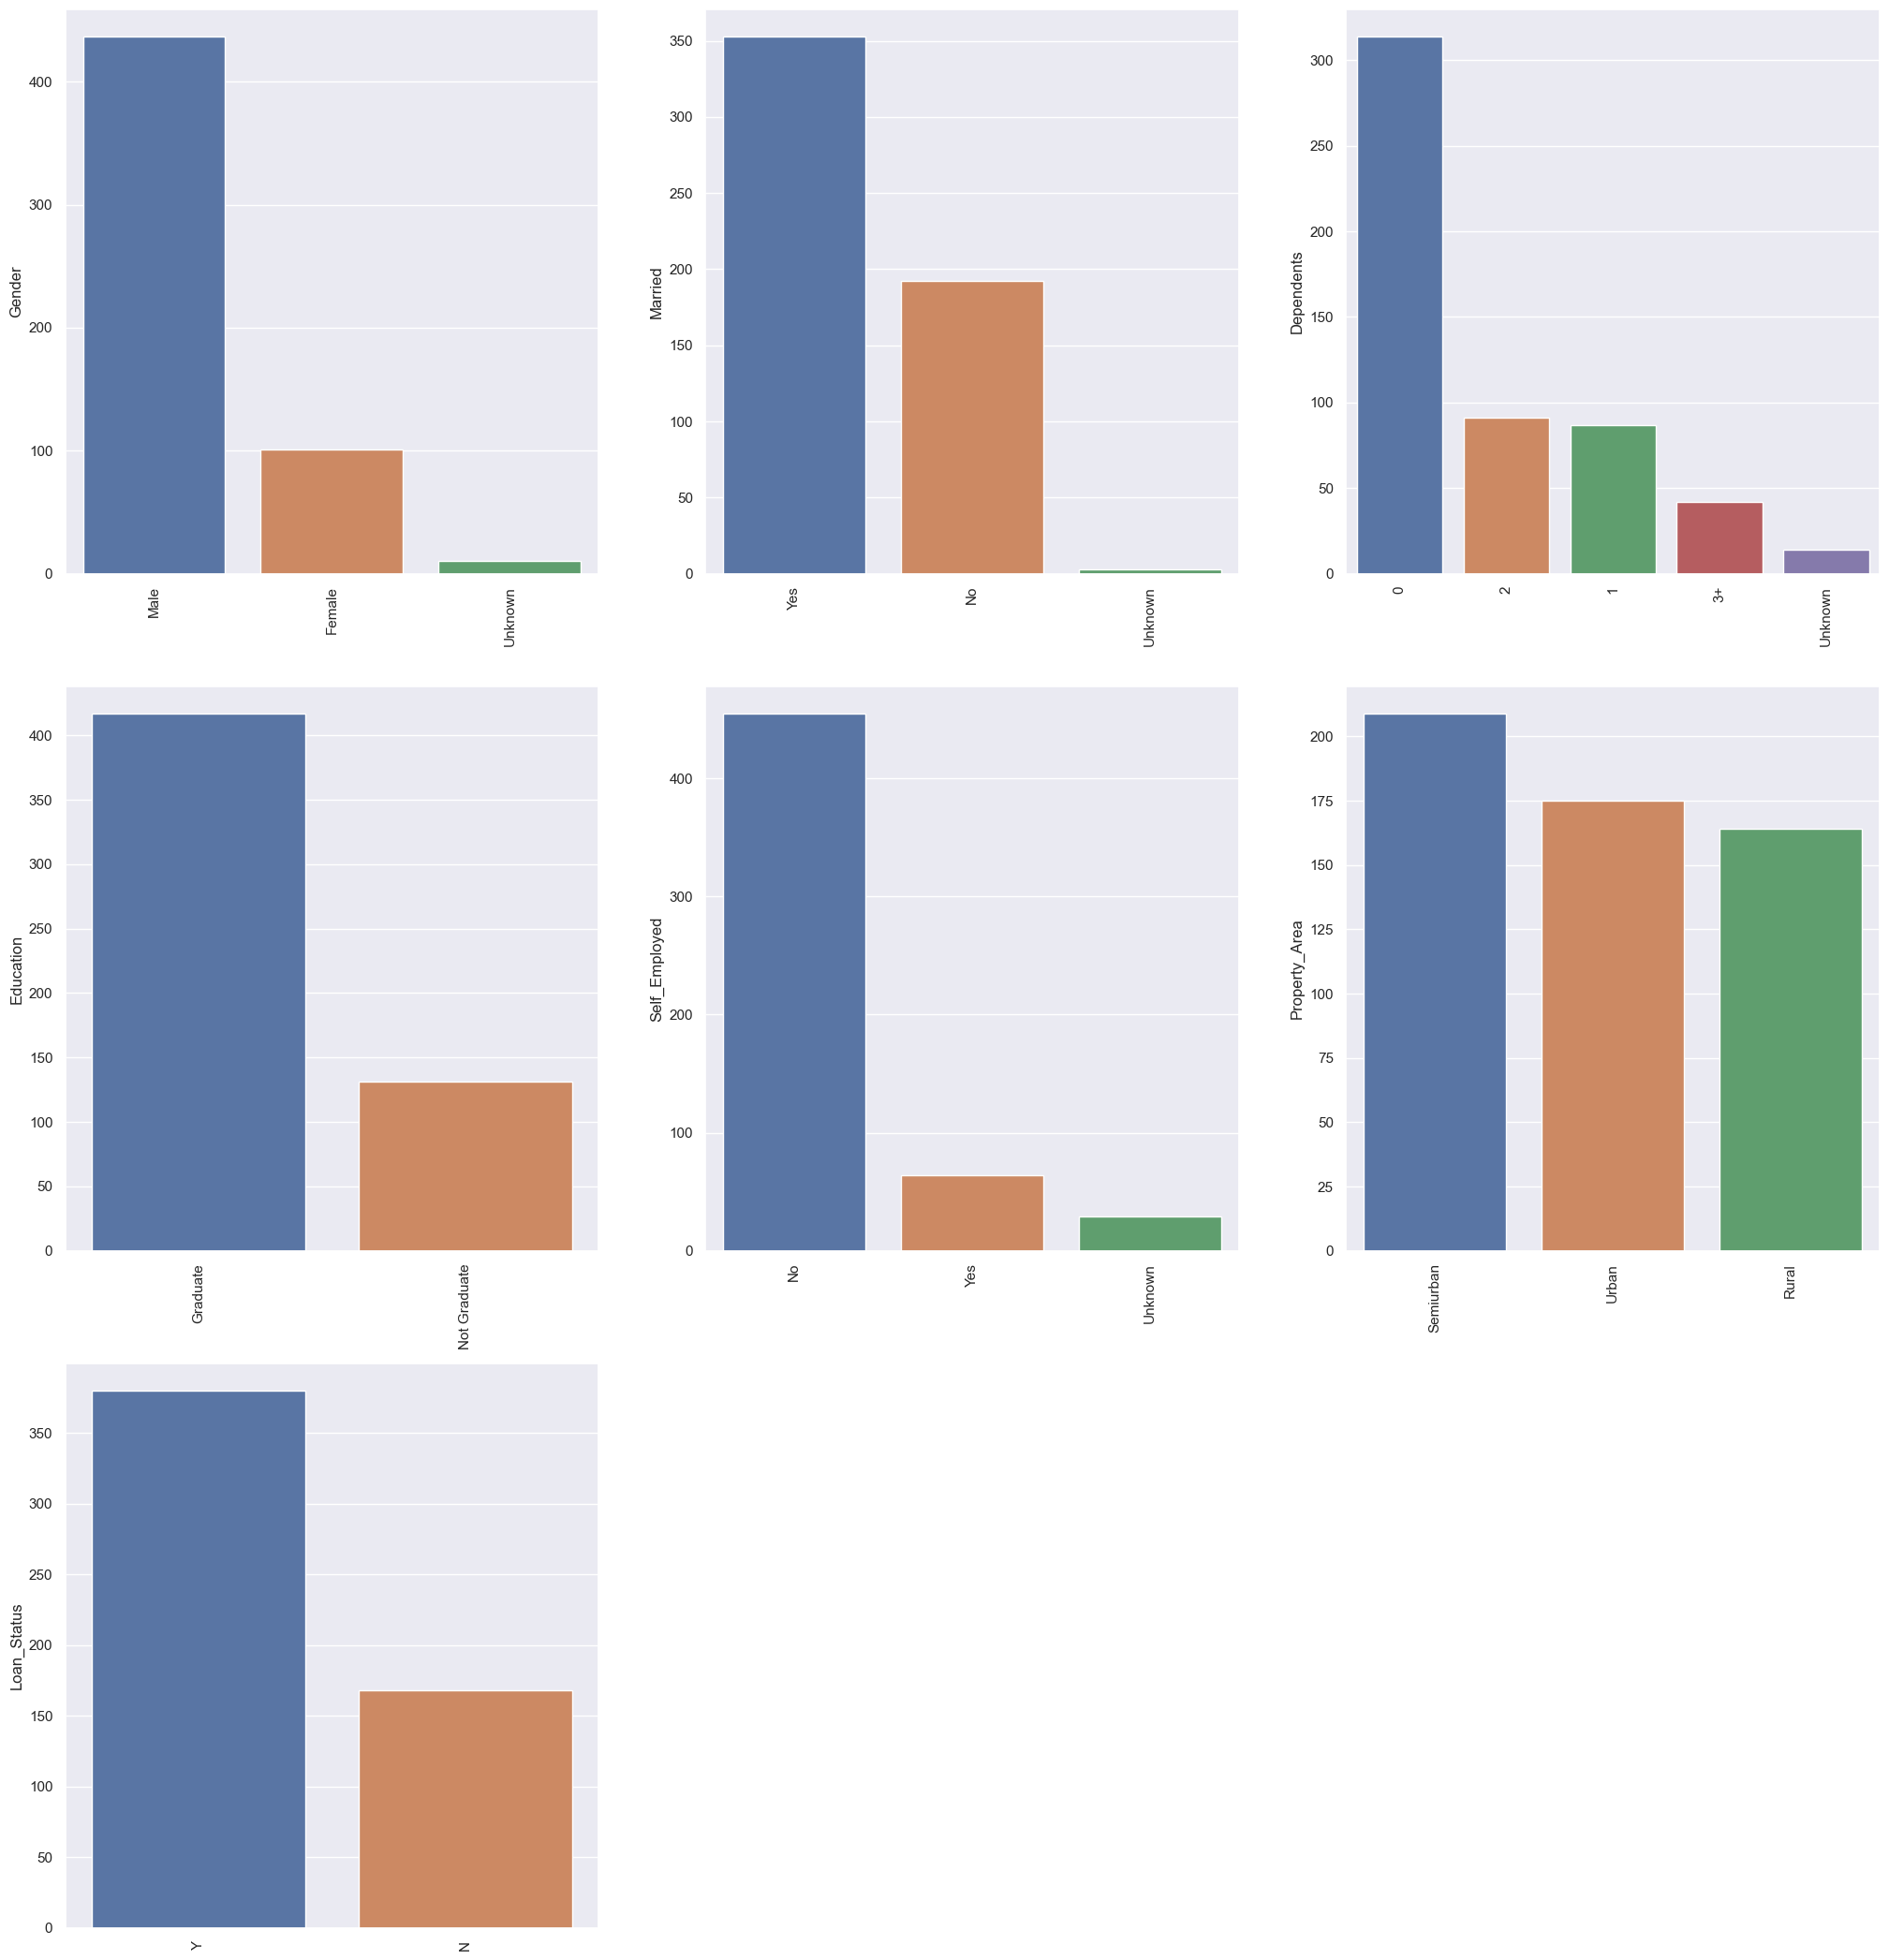

In [17]:
obj = (df.dtypes == 'object')
object_cols = list(obj[obj].index)
plt.figure(figsize = (25, 36))
index = 1

for col in object_cols:
    y = df[col].value_counts()
    plt.subplot(4, 3, index)
    plt.xticks(rotation = 90)
    sns.barplot(x = list(y.index), y=y)
    index +=1

In [18]:
# label_encoder object knows how 
# to understand word labels.

label_encoder = preprocessing.LabelEncoder()
data = df.copy()
obj = (data.dtypes == 'object')
for col in list(obj[obj].index):
    data[col] = label_encoder.fit_transform(data[col])

In [19]:
# To find the number of columns with 
# datatype==object

obj = (data.dtypes == 'object')
print("Categorical variables:", len(list(obj[obj].index)))

Categorical variables: 0


In [20]:
data.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.351260,0.148194,0.048622,0.046610,0.075557,0.207541,0.156942,-0.071789,-0.013893,-0.012058,0.019890
Married,0.351260,1.000000,0.296117,0.029239,0.008316,-0.007484,0.254815,0.165287,-0.088572,0.001144,0.021354,0.080392
Dependents,0.148194,0.296117,1.000000,0.081271,0.058808,0.133600,-0.073722,0.087772,-0.062886,-0.083758,0.043584,-0.006164
Education,0.048622,0.029239,0.081271,1.000000,-0.009898,-0.163515,-0.041492,-0.149590,-0.076792,-0.086666,-0.063284,-0.109865
Self_Employed,0.046610,0.008316,0.058808,-0.009898,1.000000,0.177256,-0.039447,0.093141,-0.053187,0.044220,-0.060148,0.000786
ApplicantIncome,0.075557,-0.007484,0.133600,-0.163515,0.177256,1.000000,-0.221291,0.519941,-0.049276,0.053022,-0.079783,0.003490
CoapplicantIncome,0.207541,0.254815,-0.073722,-0.041492,-0.039447,-0.221291,1.000000,0.333587,-0.001672,0.005422,-0.082061,0.058402
LoanAmount,0.156942,0.165287,0.087772,-0.149590,0.093141,0.519941,0.333587,1.000000,0.097504,0.017261,-0.099008,-0.026138
Loan_Amount_Term,-0.071789,-0.088572,-0.062886,-0.076792,-0.053187,-0.049276,-0.001672,0.097504,1.000000,-0.016121,-0.079854,-0.026135
Credit_History,-0.013893,0.001144,-0.083758,-0.086666,0.044220,0.053022,0.005422,0.017261,-0.016121,1.000000,0.017085,0.560916


<AxesSubplot:>

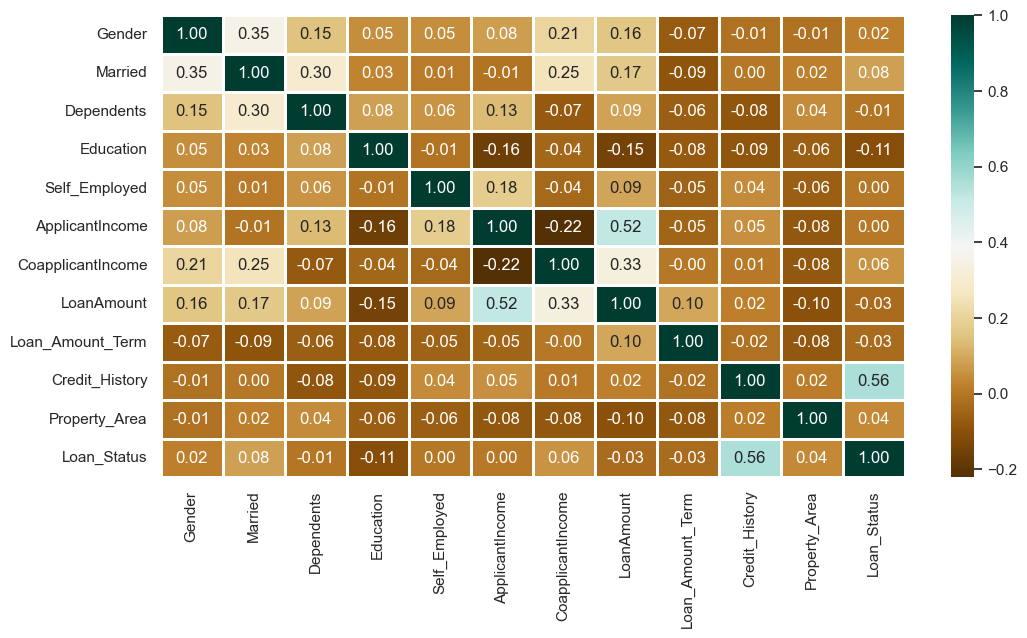

In [21]:
plt.figure(figsize=(12,6))

sns.heatmap(data.corr(),cmap='BrBG',fmt='.2f',
           linewidths=2, annot=True)

<AxesSubplot:>

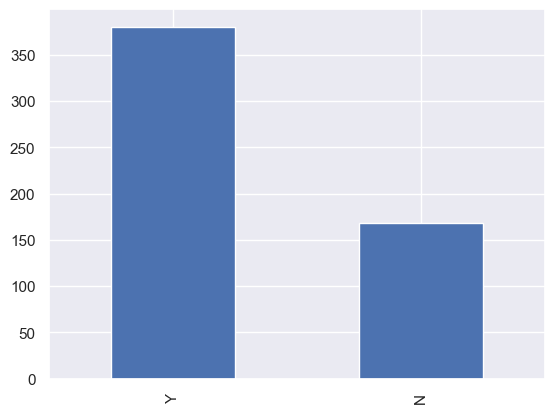

In [22]:
#

df['Loan_Status'].value_counts().plot(kind='bar')

In [39]:
df.loc[df["Loan_Status"]=="N", "Loan_Status"] = 0
df.loc[df["Loan_Status"]=="Y", "Loan_Status"] = 1
df["Loan_Status"] = df["Loan_Status"].astype("int")
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849.0,0.0,123.0,360.0,1.0,Urban,1
1,Male,Yes,1,Graduate,No,4583.0,1508.0,128.0,360.0,1.0,Rural,0
2,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,1
3,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,1
4,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,1


In [55]:
# X = df.drop(columns=["Loan_Status"])
# y = np.log(df["Loan_Status"])
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             548 non-null    object 
 1   Married            548 non-null    object 
 2   Dependents         548 non-null    object 
 3   Education          548 non-null    object 
 4   Self_Employed      548 non-null    object 
 5   ApplicantIncome    548 non-null    float64
 6   CoapplicantIncome  548 non-null    float64
 7   LoanAmount         548 non-null    float64
 8   Loan_Amount_Term   548 non-null    float64
 9   Credit_History     548 non-null    float64
 10  Property_Area      548 non-null    object 
dtypes: float64(5), object(6)
memory usage: 47.2+ KB


In [57]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 548 entries, 0 to 547
Series name: Loan_Status
Non-Null Count  Dtype
--------------  -----
548 non-null    int32
dtypes: int32(1)
memory usage: 2.3 KB


In [28]:
from sklearn.compose import make_column_transformer

transformer = make_column_transformer((OneHotEncoder(), ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area"]), remainder='passthrough')

transformed = transformer.fit_transform(X)
X_transformed = pd.DataFrame(transformed, columns=transformer.get_feature_names())
X_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onehotencoder__x0_Female        548 non-null    float64
 1   onehotencoder__x0_Male          548 non-null    float64
 2   onehotencoder__x0_Unknown       548 non-null    float64
 3   onehotencoder__x1_No            548 non-null    float64
 4   onehotencoder__x1_Unknown       548 non-null    float64
 5   onehotencoder__x1_Yes           548 non-null    float64
 6   onehotencoder__x2_0             548 non-null    float64
 7   onehotencoder__x2_1             548 non-null    float64
 8   onehotencoder__x2_2             548 non-null    float64
 9   onehotencoder__x2_3+            548 non-null    float64
 10  onehotencoder__x2_Unknown       548 non-null    float64
 11  onehotencoder__x3_Graduate      548 non-null    float64
 12  onehotencoder__x3_Not Graduate  548 

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=123)


# Sanity check hasil splitting
print("Data training:", X_train.shape, y_train.shape)
print("Data test:", X_test.shape, y_test.shape)

Data training: (438, 24) (438,)
Data test: (110, 24) (110,)


In [94]:
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438 entries, 132 to 510
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   onehotencoder__x0_Female        438 non-null    float64
 1   onehotencoder__x0_Male          438 non-null    float64
 2   onehotencoder__x0_Unknown       438 non-null    float64
 3   onehotencoder__x1_No            438 non-null    float64
 4   onehotencoder__x1_Unknown       438 non-null    float64
 5   onehotencoder__x1_Yes           438 non-null    float64
 6   onehotencoder__x2_0             438 non-null    float64
 7   onehotencoder__x2_1             438 non-null    float64
 8   onehotencoder__x2_2             438 non-null    float64
 9   onehotencoder__x2_3+            438 non-null    float64
 10  onehotencoder__x2_Unknown       438 non-null    float64
 11  onehotencoder__x3_Graduate      438 non-null    float64
 12  onehotencoder__x3_Not Graduate  43

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x0_Unknown,onehotencoder__x1_No,onehotencoder__x1_Unknown,onehotencoder__x1_Yes,onehotencoder__x2_0,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x2_3+,...,onehotencoder__x4_Unknown,onehotencoder__x4_Yes,onehotencoder__x5_Rural,onehotencoder__x5_Semiurban,onehotencoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
132,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,6277.0,0.0,118.0,360.0,0.0
490,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,6633.0,0.0,123.0,360.0,0.0
505,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,3333.0,0.0,70.0,360.0,1.0
118,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2718.0,0.0,70.0,360.0,1.0
362,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,2755.0,0.0,65.0,300.0,1.0


In [95]:
# Buat & Fit scaler
scaler = StandardScaler()
scaler.fit(X_train)

# Transform data
X_train_clean = scaler.transform(X_train)
X_train_clean = pd.DataFrame(X_train_clean,
                             columns = X_train.columns,
                             index = X_train.index)

X_train_clean.head()

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x0_Unknown,onehotencoder__x1_No,onehotencoder__x1_Unknown,onehotencoder__x1_Yes,onehotencoder__x2_0,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x2_3+,...,onehotencoder__x4_Unknown,onehotencoder__x4_Yes,onehotencoder__x5_Rural,onehotencoder__x5_Semiurban,onehotencoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
132,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,1.138377,-0.913628,-0.227030,0.24709,-2.353150
490,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,-1.121486,-0.4287,2.165251,-0.294701,...,-0.240772,2.695209,1.514342,-0.769888,-0.692625,1.327616,-0.913628,-0.131250,0.24709,-2.353150
505,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,-0.660353,-0.769888,1.443782,-0.426567,-0.913628,-1.146523,0.24709,0.424962
118,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,-0.660353,1.298891,-0.692625,-0.753483,-0.913628,-1.146523,0.24709,0.424962
362,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,-0.733815,-0.913628,-1.242304,-0.72616,0.424962


In [96]:
# Transform data
X_test_clean = scaler.transform(X_test)
X_test_clean = pd.DataFrame(X_test_clean,
                             columns = X_test.columns,
                             index = X_test.index)

X_test_clean.head()

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x0_Unknown,onehotencoder__x1_No,onehotencoder__x1_Unknown,onehotencoder__x1_Yes,onehotencoder__x2_0,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x2_3+,...,onehotencoder__x4_Unknown,onehotencoder__x4_Yes,onehotencoder__x5_Rural,onehotencoder__x5_Semiurban,onehotencoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
480,2.148345,-2.037877,-0.127441,-0.696237,-0.083045,0.707107,-1.121486,2.332633,-0.46184,-0.294701,...,-0.240772,-0.371029,-0.660353,1.298891,-0.692625,0.251185,1.037878,0.194404,-2.672659,0.424962
443,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,0.891674,-0.428700,-0.46184,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,-0.816209,0.252474,-0.437747,0.247090,0.424962
423,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,-1.121486,2.332633,-0.46184,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,-0.788036,0.115285,-0.322811,-2.672659,-2.353150
310,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,0.891674,-0.428700,-0.46184,-0.294701,...,-0.240772,-0.371029,-0.660353,1.298891,-0.692625,-0.869898,0.772418,0.577526,0.247090,0.424962
444,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,0.891674,-0.428700,-0.46184,-0.294701,...,-0.240772,-0.371029,-0.660353,-0.769888,1.443782,0.260222,1.046109,-0.361123,-5.397757,0.424962


In [97]:
# Cek missing values
X_train_clean.isna().any()

onehotencoder__x0_Female          False
onehotencoder__x0_Male            False
onehotencoder__x0_Unknown         False
onehotencoder__x1_No              False
onehotencoder__x1_Unknown         False
onehotencoder__x1_Yes             False
onehotencoder__x2_0               False
onehotencoder__x2_1               False
onehotencoder__x2_2               False
onehotencoder__x2_3+              False
onehotencoder__x2_Unknown         False
onehotencoder__x3_Graduate        False
onehotencoder__x3_Not Graduate    False
onehotencoder__x4_No              False
onehotencoder__x4_Unknown         False
onehotencoder__x4_Yes             False
onehotencoder__x5_Rural           False
onehotencoder__x5_Semiurban       False
onehotencoder__x5_Urban           False
ApplicantIncome                   False
CoapplicantIncome                 False
LoanAmount                        False
Loan_Amount_Term                  False
Credit_History                    False
dtype: bool

In [98]:
y_train.value_counts()

1    299
0    139
Name: Loan_Status, dtype: int64

In [106]:
# Buat objek
smt = SMOTE(sampling_strategy = "minority",
            random_state = 123)

# Fit objek
X_train_smote, y_train = smt.fit_resample(X_train_clean, y_train)

In [107]:
y_train.value_counts()

0    299
1    299
Name: Loan_Status, dtype: int64

In [109]:
X_train_smote.head()

,onehotencoder__x0_Female,onehotencoder__x0_Male,onehotencoder__x0_Unknown,onehotencoder__x1_No,onehotencoder__x1_Unknown,onehotencoder__x1_Yes,onehotencoder__x2_0,onehotencoder__x2_1,onehotencoder__x2_2,onehotencoder__x2_3+,...,onehotencoder__x4_Unknown,onehotencoder__x4_Yes,onehotencoder__x5_Rural,onehotencoder__x5_Semiurban,onehotencoder__x5_Urban,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,1.138377,-0.913628,-0.227030,0.24709,-2.353150
1,-0.465475,0.490707,-0.127441,-0.696237,-0.083045,0.707107,-1.121486,-0.4287,2.165251,-0.294701,...,-0.240772,2.695209,1.514342,-0.769888,-0.692625,1.327616,-0.913628,-0.131250,0.24709,-2.353150
2,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,-0.660353,-0.769888,1.443782,-0.426567,-0.913628,-1.146523,0.24709,0.424962
3,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,-0.660353,1.298891,-0.692625,-0.753483,-0.913628,-1.146523,0.24709,0.424962
4,-0.465475,0.490707,-0.127441,1.436293,-0.083045,-1.414214,0.891674,-0.4287,-0.461840,-0.294701,...,-0.240772,-0.371029,1.514342,-0.769888,-0.692625,-0.733815,-0.913628,-1.242304,-0.72616,0.424962


In [103]:
# This dictionary is use to store the best parameter for each model
# will be used when we train the data with the best hyperparam
cv_best_params = {}

In [208]:
log_reg = LogisticRegression(solver="liblinear",
                             random_state=123)

logreg_search_params = {"penalty": ["l1", "l2"],
                 "C": np.logspace(-5, 5, 20)}

logreg_cv = GridSearchCV(estimator = log_reg,
                         param_grid = logreg_search_params,
                         cv = 10)

In [209]:
# Lakukan Fitting Data
logreg_cv.fit(X = X_train_smote,
              y = y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(random_state=123, solver='liblinear'),
             param_grid={'C': array([1.00000000e-05, 3.35981829e-05, 1.12883789e-04, 3.79269019e-04,
       1.27427499e-03, 4.28133240e-03, 1.43844989e-02, 4.83293024e-02,
       1.62377674e-01, 5.45559478e-01, 1.83298071e+00, 6.15848211e+00,
       2.06913808e+01, 6.95192796e+01, 2.33572147e+02, 7.84759970e+02,
       2.63665090e+03, 8.85866790e+03, 2.97635144e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2']})

In [152]:
logreg_cv.best_params_

{'C': 0.04832930238571752, 'penalty': 'l1'}

In [153]:
cv_best_params["logistic reg"] = logreg_cv.best_params_

In [154]:
dec_tree = DecisionTreeClassifier(criterion="gini",
                                  random_state=123)
dec_tree_hyperparam = {
    "max_depth": np.arange(5, 37),
}

dectree_cv = GridSearchCV(estimator = dec_tree,
                         param_grid = dec_tree_hyperparam,
                         cv = 5)

In [155]:
# Lakukan Fitting Data
dectree_cv.fit(X = X_train_smote,
              y = y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'max_depth': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36])})

In [156]:
dectree_cv.best_params_

{'max_depth': 16}

In [157]:
cv_best_params["decision tree"] = dectree_cv.best_params_

In [158]:
ada_dtree = DecisionTreeClassifier(max_depth=2, random_state=123)

ada_boost = AdaBoostClassifier(base_estimator=ada_dtree,
                               random_state=123)

ada_boost_hyparams = {
    "n_estimators": [200, 300, 400, 500, 600, 700]
}

ada_boost_cv = GridSearchCV(estimator = ada_boost,
                         param_grid = ada_boost_hyparams,
                         cv = 10)

In [159]:
# Lakukan Fitting Data
ada_boost_cv.fit(X = X_train_smote,
              y = y_train)

GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                                                random_state=123),
                                          random_state=123),
             param_grid={'n_estimators': [200, 300, 400, 500, 600, 700]})

In [160]:
ada_boost_cv.best_params_

{'n_estimators': 500}

In [161]:
cv_best_params["adaboost"] = ada_boost_cv.best_params_

In [162]:
gboost = GradientBoostingClassifier(random_state=123)

gboost_hyparams = {
    "n_estimators": [200, 300, 400, 500, 600, 700]
}

gboost_cv = GridSearchCV(estimator = gboost,
                         param_grid = gboost_hyparams,
                         cv = 10)

In [163]:
# Lakukan Fitting Data
gboost_cv.fit(X = X_train_smote,
              y = y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(random_state=123),
             param_grid={'n_estimators': [200, 300, 400, 500, 600, 700]})

In [164]:
gboost_cv.best_params_

{'n_estimators': 700}

In [165]:
cv_best_params["gradient boost"] = gboost_cv.best_params_

In [167]:
random_forest = RandomForestClassifier(criterion="gini",
                                       max_features="sqrt",
                                       random_state=123)

random_forest_hyparams = {
    "n_estimators": [200, 300, 400, 500, 600, 700]
}

random_forest_cv = GridSearchCV(estimator = random_forest,
                         param_grid = random_forest_hyparams,
                         cv = 10)

In [168]:
# Lakukan Fitting Data
random_forest_cv.fit(X = X_train_smote,
              y = y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_features='sqrt',
                                              random_state=123),
             param_grid={'n_estimators': [200, 300, 400, 500, 600, 700]})

In [169]:
random_forest_cv.best_params_

{'n_estimators': 500}

In [170]:
cv_best_params["random forest"] = random_forest_cv.best_params_

In [171]:
log_reg_train = LogisticRegression(penalty=cv_best_params["logistic reg"]["penalty"],
                                   C=cv_best_params["logistic reg"]["C"],
                                   solver="liblinear",
                                   random_state=123)

In [172]:
log_reg_train.fit(X_train_smote, y_train)

LogisticRegression(C=0.04832930238571752, penalty='l1', random_state=123,
                   solver='liblinear')

In [173]:
log_reg_train_proba = log_reg_train.predict_proba(X_train_smote)

In [225]:
log_reg_train_pred = modelPredictionResult(classifier=log_reg_train,
                                           input_data=X_train_smote,
                                           output_data=y_train)

Confusion Matrix
[True Negative: 155    False Negative: 144]
[False Positive: 4   True Positive: 295]


Classification Report
              precision    recall  f1-score   support

          no       0.97      0.52      0.68       299
         yes       0.67      0.99      0.80       299

    accuracy                           0.75       598
   macro avg       0.82      0.75      0.74       598
weighted avg       0.82      0.75      0.74       598



In [226]:
log_reg_train_score = classScore(model_prediction=log_reg_train_pred,
                                 output_data=y_train)

Classification Score Summary
Classifier Accuracy score:  0.7525083612040134
Classifier Recall score:  0.9866220735785953
Classifier f1-score:  0.7994579945799458
Classifier precision:  0.6719817767653758


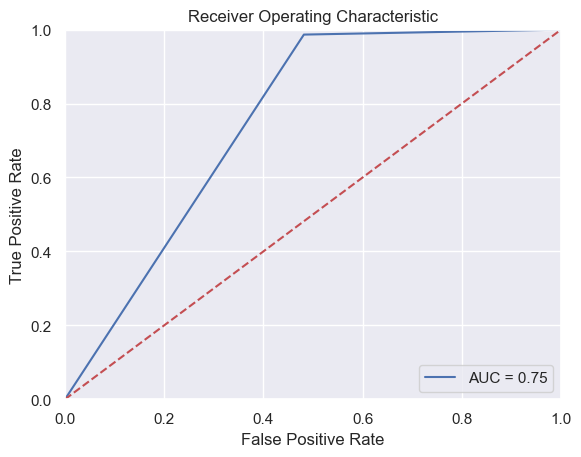

In [182]:
log_reg_train_aucroc = rocAucResult(model_prediction=log_reg_train_pred,
                                    output_data=y_train)

In [183]:
dtree_train = DecisionTreeClassifier(max_depth=cv_best_params["decision tree"]["max_depth"],
                                     random_state=123)

In [184]:
dtree_train.fit(X_train_smote, y_train)

DecisionTreeClassifier(max_depth=16, random_state=123)

In [227]:
dtree_train_pred = modelPredictionResult(classifier=dtree_train,
                                         input_data=X_train_smote,
                                         output_data=y_train)

Confusion Matrix
[True Negative: 299    False Negative: 0]
[False Positive: 0   True Positive: 299]


Classification Report
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       299
         yes       1.00      1.00      1.00       299

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



In [228]:
dtree_train_scores = classScore(model_prediction=dtree_train_pred,
                                output_data=y_train)

Classification Score Summary
Classifier Accuracy score:  1.0
Classifier Recall score:  1.0
Classifier f1-score:  1.0
Classifier precision:  1.0


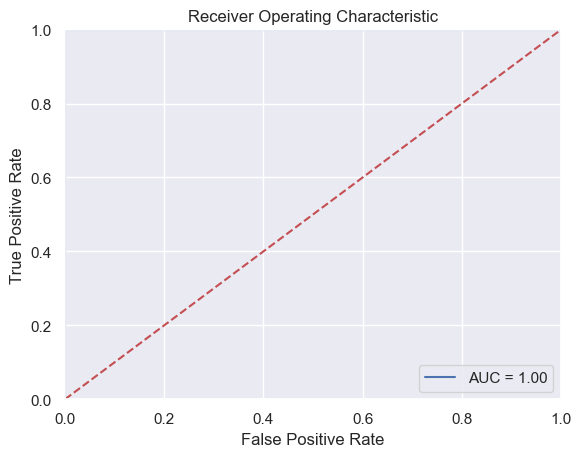

In [187]:
dtree_train_auroc = rocAucResult(model_prediction=dtree_train_pred,
                                 output_data=y_train)

In [188]:
ada_dtree_train = DecisionTreeClassifier(max_depth=2, random_state=123)
adaboost_train = AdaBoostClassifier(base_estimator=ada_dtree_train,
                                    n_estimators=cv_best_params["adaboost"]["n_estimators"],
                                    random_state=123)

In [189]:
adaboost_train.fit(X_train_smote, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2,
                                                         random_state=123),
                   n_estimators=500, random_state=123)

In [229]:
adaboost_train_pred = modelPredictionResult(classifier=adaboost_train,
                                            input_data=X_train_smote,
                                            output_data=y_train)

Confusion Matrix
[True Negative: 299    False Negative: 0]
[False Positive: 0   True Positive: 299]


Classification Report
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       299
         yes       1.00      1.00      1.00       299

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



In [231]:
adaboost_train_pred = adaboost_train.predict(X_train_smote)

In [232]:
adaboost_train_score = classScore(model_prediction=adaboost_train_pred,
                                  output_data=y_train)

Classification Score Summary
Classifier Accuracy score:  1.0
Classifier Recall score:  1.0
Classifier f1-score:  1.0
Classifier precision:  1.0


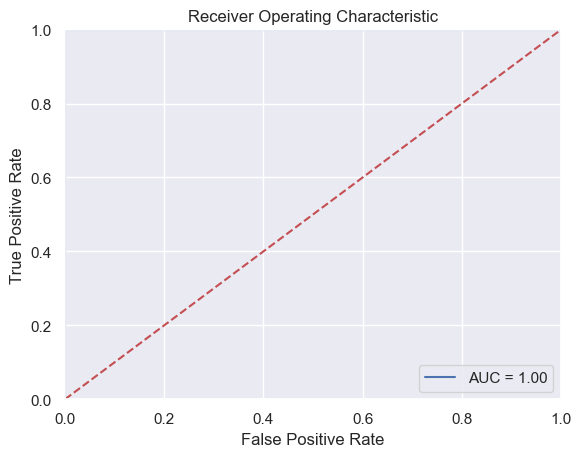

In [197]:
adaboost_train_aucroc = rocAucResult(model_prediction=adaboost_train_pred,
                                     output_data=y_train)

In [198]:
gboost_train = GradientBoostingClassifier(
    n_estimators=cv_best_params["gradient boost"]["n_estimators"],
    random_state=123
)

In [199]:
gboost_train.fit(X_train_smote, y_train)

GradientBoostingClassifier(n_estimators=700, random_state=123)

In [233]:
gboost_train_pred = modelPredictionResult(classifier=gboost_train,
                                          input_data=X_train_smote,
                                          output_data=y_train)

Confusion Matrix
[True Negative: 299    False Negative: 0]
[False Positive: 0   True Positive: 299]


Classification Report
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       299
         yes       1.00      1.00      1.00       299

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



In [234]:
gboost_train_score = classScore(model_prediction=gboost_train_pred,
                                output_data=y_train)

Classification Score Summary
Classifier Accuracy score:  1.0
Classifier Recall score:  1.0
Classifier f1-score:  1.0
Classifier precision:  1.0


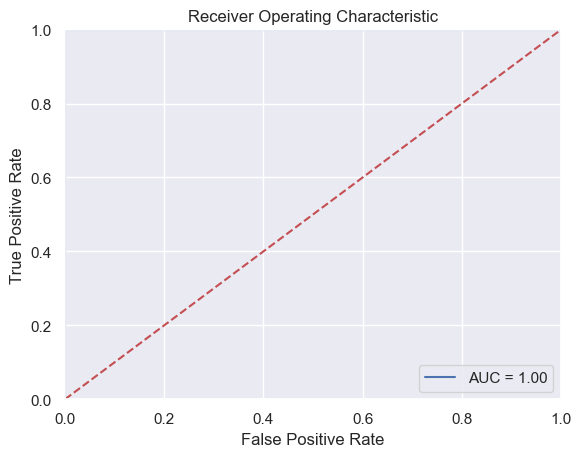

In [202]:
gboost_train_aucroc = rocAucResult(model_prediction=gboost_train_pred,
                                   output_data=y_train)

In [203]:
r_forest_train = RandomForestClassifier(
    criterion="entropy",
    n_estimators=cv_best_params["random forest"]["n_estimators"],
    max_features="sqrt",
    random_state=123
)

In [204]:
r_forest_train.fit(X_train_smote, y_train)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=500, random_state=123)

In [235]:
r_forest_train_pred = modelPredictionResult(classifier=r_forest_train,
                                            input_data=X_train_smote,
                                            output_data=y_train)

Confusion Matrix
[True Negative: 299    False Negative: 0]
[False Positive: 0   True Positive: 299]


Classification Report
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       299
         yes       1.00      1.00      1.00       299

    accuracy                           1.00       598
   macro avg       1.00      1.00      1.00       598
weighted avg       1.00      1.00      1.00       598



In [236]:
r_forest_train_score = classScore(model_prediction=r_forest_train_pred,
                                  output_data=y_train)

Classification Score Summary
Classifier Accuracy score:  1.0
Classifier Recall score:  1.0
Classifier f1-score:  1.0
Classifier precision:  1.0


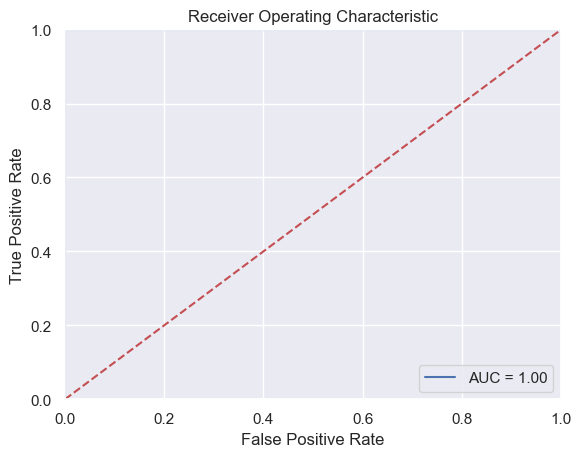

In [211]:
r_forest_train_aucroc = rocAucResult(model_prediction=r_forest_train_pred,
                                     output_data=y_train)

In [237]:
train_score = {
    "Logistic Regression": log_reg_train_score,
    "Decision Tree": dtree_train_scores,
    "Random Forest": r_forest_train_score,
    "Adaboost": adaboost_train_score,
    "Gradient Boost": gboost_train_score,
}

In [238]:
train_score_df = pd.DataFrame(train_score)
train_score_df

,Logistic Regression,Decision Tree,Random Forest,Adaboost,Gradient Boost
accuracy,0.752508,1.0,1.0,1.0,1.0
recall,0.986622,1.0,1.0,1.0,1.0
f1_score,0.799458,1.0,1.0,1.0,1.0
precision,0.671982,1.0,1.0,1.0,1.0


In [239]:
auc_roc_data = {
    "Logistic Regression": log_reg_train_aucroc,
    "Decision Tree": dtree_train_auroc,
    "Random Forest": r_forest_train_aucroc,
    "Adaboost": adaboost_train_aucroc,
    "Gradient Boost": gboost_train_aucroc,
}

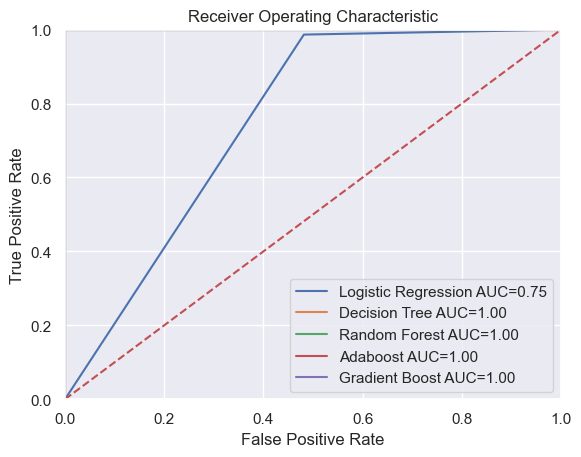

In [240]:
plt.title('Receiver Operating Characteristic')

for key in auc_roc_data.keys():
    fpr = auc_roc_data[key]["fpr"]
    tpr = auc_roc_data[key]["tpr"]
    roc_auc = auc_roc_data[key]["roc_auc"]

    plt.plot(fpr, tpr, label="%s AUC=%0.2f" % (key, roc_auc))

# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [241]:
logreg_test_pred = modelPredictionResult(classifier=log_reg_train,
                                         input_data=X_test_clean,
                                         output_data=y_test)

Confusion Matrix
[True Negative: 11    False Negative: 18]
[False Positive: 1   True Positive: 80]


Classification Report
              precision    recall  f1-score   support

          no       0.92      0.38      0.54        29
         yes       0.82      0.99      0.89        81

    accuracy                           0.83       110
   macro avg       0.87      0.68      0.72       110
weighted avg       0.84      0.83      0.80       110



In [242]:
logreg_test_score = classScore(model_prediction=logreg_test_pred,
                               output_data=y_test)

Classification Score Summary
Classifier Accuracy score:  0.8272727272727273
Classifier Recall score:  0.9876543209876543
Classifier f1-score:  0.893854748603352
Classifier precision:  0.8163265306122449


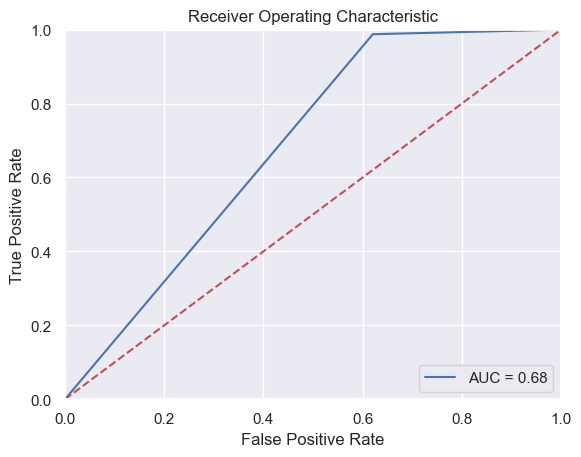

In [243]:
logreg_test_aucroc = rocAucResult(model_prediction=logreg_test_pred,
                                  output_data=y_test)

In [244]:
dtree_test_pred = modelPredictionResult(classifier=dtree_train,
                                        input_data=X_test_clean,
                                        output_data=y_test)

Confusion Matrix
[True Negative: 12    False Negative: 17]
[False Positive: 17   True Positive: 64]


Classification Report
              precision    recall  f1-score   support

          no       0.41      0.41      0.41        29
         yes       0.79      0.79      0.79        81

    accuracy                           0.69       110
   macro avg       0.60      0.60      0.60       110
weighted avg       0.69      0.69      0.69       110



In [245]:
dtree_test_score = classScore(model_prediction=dtree_test_pred,
                              output_data=y_test)

Classification Score Summary
Classifier Accuracy score:  0.6909090909090909
Classifier Recall score:  0.7901234567901234
Classifier f1-score:  0.7901234567901234
Classifier precision:  0.7901234567901234


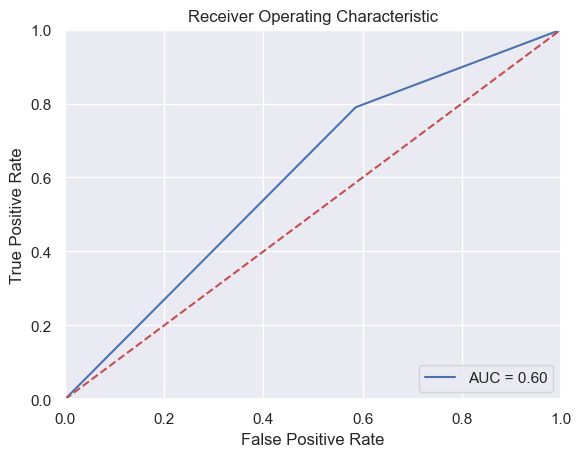

In [246]:
dtree_test_aucroc = rocAucResult(model_prediction=dtree_test_pred,
                                 output_data=y_test)

In [247]:
adaboost_test_pred = modelPredictionResult(classifier=adaboost_train,
                                           input_data=X_test_clean,
                                           output_data=y_test)

Confusion Matrix
[True Negative: 15    False Negative: 14]
[False Positive: 17   True Positive: 64]


Classification Report
              precision    recall  f1-score   support

          no       0.47      0.52      0.49        29
         yes       0.82      0.79      0.81        81

    accuracy                           0.72       110
   macro avg       0.64      0.65      0.65       110
weighted avg       0.73      0.72      0.72       110



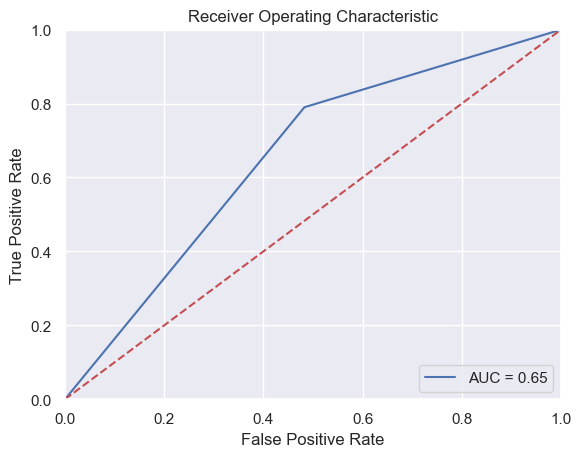

In [248]:
adaboost_test_aucroc = rocAucResult(model_prediction=adaboost_test_pred,
                                    output_data=y_test)

In [249]:
adaboost_test_score = classScore(model_prediction=adaboost_test_pred,
                                 output_data=y_test)

Classification Score Summary
Classifier Accuracy score:  0.7181818181818181
Classifier Recall score:  0.7901234567901234
Classifier f1-score:  0.8050314465408805
Classifier precision:  0.8205128205128205


In [250]:
gboost_test_pred = modelPredictionResult(classifier=gboost_train,
                                         input_data=X_test_clean,
                                         output_data=y_test)

Confusion Matrix
[True Negative: 15    False Negative: 14]
[False Positive: 16   True Positive: 65]


Classification Report
              precision    recall  f1-score   support

          no       0.48      0.52      0.50        29
         yes       0.82      0.80      0.81        81

    accuracy                           0.73       110
   macro avg       0.65      0.66      0.66       110
weighted avg       0.73      0.73      0.73       110



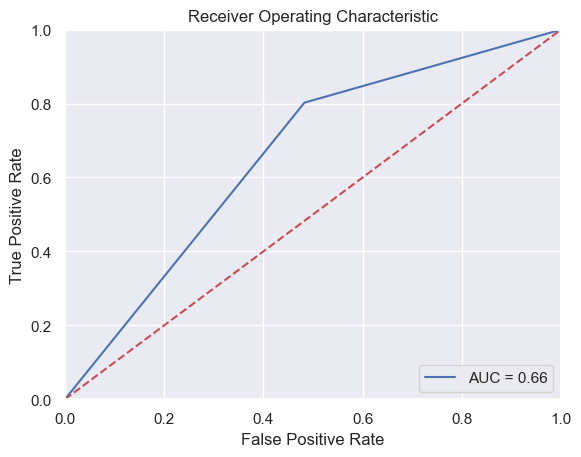

In [251]:
gboost_test_aucroc = rocAucResult(model_prediction=gboost_test_pred,
                                  output_data=y_test)

In [252]:
gboost_test_score = classScore(model_prediction=gboost_test_pred,
                                output_data=y_test)

Classification Score Summary
Classifier Accuracy score:  0.7272727272727273
Classifier Recall score:  0.8024691358024691
Classifier f1-score:  0.8125000000000001
Classifier precision:  0.8227848101265823


In [253]:
rdforest_test_pred = modelPredictionResult(classifier=r_forest_train,
                                           input_data=X_test_clean,
                                           output_data=y_test)

Confusion Matrix
[True Negative: 12    False Negative: 17]
[False Positive: 6   True Positive: 75]


Classification Report
              precision    recall  f1-score   support

          no       0.67      0.41      0.51        29
         yes       0.82      0.93      0.87        81

    accuracy                           0.79       110
   macro avg       0.74      0.67      0.69       110
weighted avg       0.78      0.79      0.77       110



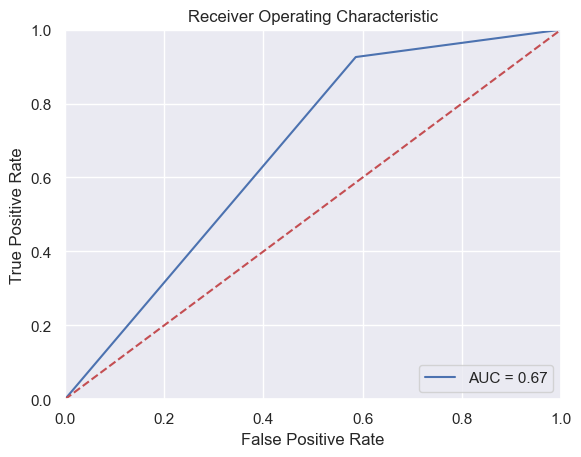

In [254]:
rdforest_test_aucroc = rocAucResult(model_prediction=rdforest_test_pred,
                                    output_data=y_test)

In [255]:
rforest_test_score = classScore(model_prediction=rdforest_test_pred,
                                output_data=y_test)

Classification Score Summary
Classifier Accuracy score:  0.7909090909090909
Classifier Recall score:  0.9259259259259259
Classifier f1-score:  0.8670520231213872
Classifier precision:  0.8152173913043478


In [256]:
test_scores = {
    "Logistic Regression": logreg_test_score,
    "Decision Tree": dtree_test_score,
    "Random Forest": rforest_test_score,
    "Adaboost": adaboost_test_score,
    "Gradient Boost": gboost_test_score,
}

In [257]:
test_scores_df = pd.DataFrame(test_scores)
test_scores_df

,Logistic Regression,Decision Tree,Random Forest,Adaboost,Gradient Boost
accuracy,0.827273,0.690909,0.790909,0.718182,0.727273
recall,0.987654,0.790123,0.925926,0.790123,0.802469
f1_score,0.893855,0.790123,0.867052,0.805031,0.812500
precision,0.816327,0.790123,0.815217,0.820513,0.822785


In [258]:
test_aucroc = {
    "Logistic Regression": logreg_test_aucroc,
    "Decision Tree": dtree_test_aucroc,
    "Random Forest": rdforest_test_aucroc,
    "Adaboost": adaboost_test_aucroc,
    "Gradient Boost": gboost_test_aucroc,
}

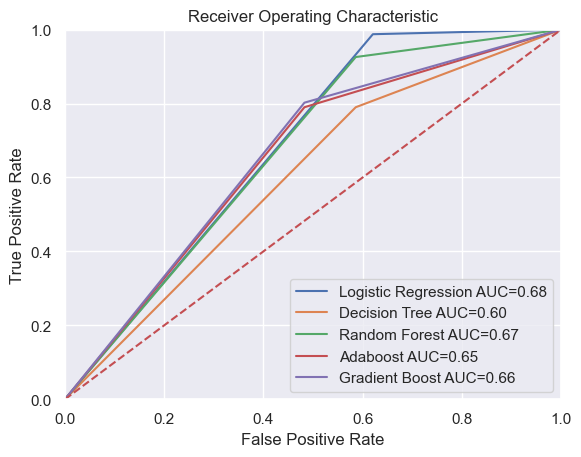

In [259]:
plt.title('Receiver Operating Characteristic')

for key in test_aucroc.keys():
    fpr = test_aucroc[key]["fpr"]
    tpr = test_aucroc[key]["tpr"]
    roc_auc = test_aucroc[key]["roc_auc"]

    plt.plot(fpr, tpr, label="%s AUC=%0.2f" % (key, roc_auc))

# plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()